# POLI 175 - Lecture 10

## Resampling

# Resampling

## Resampling

Involve repeatedly drawing `samples` for a `training dataset` to obtain fitting information.

`Samples`: A randomly selected fraction of the original data. Do not mistake it for a different sample from a population.
    
`Training`: Training the model means to fit the model and find out the model's parameters. In a regression, this means identify the $\beta$'s.

## Resampling

### Why not fit the model into the actual data?

We need a measure of how well a model is doing.

In the end, this matters! And it matters especially for the data that we did not train the model!

Resampling is a clever trick to see how the model would do in the `real world`, without actually deploying it in the real world.

## Resampling

Helps us to:

1. Evaluate the performance of the model (`Model assessment`).
2. Select the proper flexibility for our model (`Model selection`).

**Drawback:** Resampling methods are computationally intensive. Resampling involves refitting the model again and again.
    
We are going to discuss the following:

- `Cross-validation`: Measures the performance and selects appropriate flexibility (bias-variance trade-off).
- `Bootstrap`: Measures the accuracy of parameters.

## Class Examples

1. Education expenditure dataset

1. Pinochet voting dataset

Let us load them all:

In [23]:
XXXX

## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading scikit learn relevant packages (note our new friends!)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
XXXX


## Loading Chile data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
chile_clean.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0,0,1,0,0,0,1


In [25]:
## Education Expenditure Dataset
educ = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/educexp.csv')
educ = educ.set_index('states')
for i in educ.columns:
    educ[i + '_log'] = np.log(educ[i])
educ.head()

,education,income,young,urban,education_log,income_log,young_log,urban_log
states,,,,,,,,
ME,189,2824,350.7,508,5.241747,7.945910,5.859931,6.230481
NH,169,3259,345.9,564,5.129899,8.089176,5.846150,6.335054
VT,230,3072,348.5,322,5.438079,8.030084,5.853638,5.774552
MA,168,3835,335.3,846,5.123964,8.251925,5.815026,6.740519
RI,180,3549,327.1,871,5.192957,8.174421,5.790266,6.769642


## Cross-Validation

In Class 02, we discussed two ideas, derived from splitting the data in two portions:

1. `Training error rate`: The error when fitting the model to data that was used to train the parameters, and
1. `Testing error rate`: The error associated with fitting the model to ***unseen*** data.

As it should be intuitive, we can perform multiple types of cross-validation, all depending on how we split our data.

## Cross-Validation

### Validation Set Approach

Randomly split the data into two sets:

- `Training set`: The data used to fit the model
- `Testing set`: The data used to test the performance of the fitted model.

One example is to split the sample in half-training--half-testing and running the estimation:

![img vsa](https://github.com/umbertomig/POLI175julia/blob/c9b0555e3e97778495bee72746aee43ddf3226d7/img/cv1.png?raw=true)

## Cross-Validation

### Validation Set Approach

In Julia, we can do the following:

In [ ]:
XXXX

In [28]:
## With 50% split (no urban_log)
y = educ['education_log']
X = educ[['income_log', 'young_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1234)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

np.sum((y_pred - y_test) ** 2)

0.420869636137682

In [37]:
## With 50% split (with urban_log)
y = educ['education_log']
X = educ[['income_log', 'young_log', 'urban_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1234)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
np.sum((y_pred - y_test) ** 2)

0.13648708256611777

In [6]:
## Your turn: Check the MSE when removing income_log. Is it
##  better?

In [7]:
## Your turn: Check the MSE when removing 'urban_pop' 
##   with only 20% of observations in the testing set.

## Cross-Validation

### Leave-One-Out Cross-Validation

- It does what it says: leaves one observation out and fits the model with $n-1$ cases.

- Then, it predicts the results in the case left out.

- **Great** for small datasets and when prediction is critical.

- **Bad** in terms of computational time.

$$ CV_n \ = \ \dfrac{1}{n}\sum_i MSE_i $$

## Cross-Validation

### Leave-One-Out Cross-Validation

![img](https://github.com/umbertomig/POLI175julia/blob/c9b0555e3e97778495bee72746aee43ddf3226d7/img/cv2.png?raw=true)

In [40]:
## LOOCV
## Variables: model without urban population
y = educ['education_log']
X = educ[['income_log','young_log']]

## Leave-One-Out-CV
cv = LeaveOneOut()
reg = LinearRegression()

## Run the CV
scores = cross_val_score(reg, X, y,
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

## RMSE
print(np.sqrt(np.mean(np.absolute(scores))))

## MSE
np.mean(np.absolute(scores))

0.1438784463664138


0.02070100732881302

In [41]:
## LOOCV
## Variables: model **with** urban population
y = educ['education_log']
X = educ[['income_log', 'young_log', 'urban_log']]

## Leave-One-Out-CV
cv = LeaveOneOut()
reg = LinearRegression()


## Run the CV
scores = cross_val_score(reg, X, y, 
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

## MSE
print(np.mean(np.absolute(scores)))

## RMSE
np.sqrt(np.mean(np.absolute(scores)))

0.018296937636424527


0.13526617328964594

In [10]:
## Your turn: compare the model with x without logs
## Note: the target has to be the same!

## Cross-Validation

### Metrics

- To do the comparison, you need a metric.

- `scikit learn` has many matrics available:

In [42]:
## Lots of stats to compute the error:
print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [12]:
## Your turn: find and use R-squared as the parameter for a
## LOOCV. What is the difference?

## Cross-Validation

### K-Fold Cross-Validation

- Leaves $k$ groups out and fits the model with the observations outside each group.

- Then, it predicts the results in the cases left out.

- **Great** in most cases.

- **Bad** *sometimes* computationally expensive.

$$ CV_k \ = \ \dfrac{1}{k}\sum_i MSE_i $$

## Cross-Validation

### K-Fold Cross-Validation

![img](https://github.com/umbertomig/POLI175julia/blob/c9b0555e3e97778495bee72746aee43ddf3226d7/img/cv3.png?raw=true)

In [43]:
## K-Fold CV (k = 5)
y = educ['education_log']
X = educ[['income_log', 'young_log']]

## k-Fold CV (n_splits = k, shuffle: reshuffle data before split)
cv = KFold(n_splits = 5, random_state = 1234, shuffle = True) 
reg = LinearRegression()


## Run the CV
scores = cross_val_score(reg, X, y,
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

## MSE
print(np.mean(np.absolute(scores)))

## RMSE
np.sqrt(np.mean(np.absolute(scores)))

0.023330828312154113


0.15274432333855853

In [44]:
## K-Fold CV (k = 5)
y = educ['education_log']
X = educ[['income_log', 'young_log', 'urban_log']]

## k-Fold CV (n_splits = k, shuffle: reshuffle data before split)
cv = KFold(n_splits = 5, random_state = 1234, shuffle = True) 
reg = LinearRegression()


## Run the CV
scores = cross_val_score(reg, X, y,
                         scoring = 'neg_mean_squared_error',
                         cv = cv)

## MSE
print(np.mean(np.absolute(scores)))

## RMSE
np.sqrt(np.mean(np.absolute(scores)))

0.02108853432951009


0.1452189186349702

In [15]:
## Your turn: Run a 10-fold CV? Any differences?

## Cross-Validation

### Bias-Variance Trade-off

- k-Fold CV is more computationally efficient than LOOCV. But how about Bias-Variance Trade-offs?

- Larger fractions in a two-split leads to high bias: over-estimates the error rates.

- LOOCV: leaves just one, so it gives an unbiased estimate of the testing error rates: 
    + Very good for bias reduction!

## Cross-Validation

### Bias-Variance Trade-off

- LOOCV has high variance: almost the same observations at each run!
    + Very bad for variance.
    
- k-Fold CV:
    + Each subset is a *bit more different* than the other.
    + Leads to less correlation between each fold.
    + Good balance usually with $k=5$ or $k=10$.

## Cross-Validation

### Bias-Variance Trade-off

![img](https://github.com/umbertomig/POLI175julia/blob/c9b0555e3e97778495bee72746aee43ddf3226d7/img/cv4.png?raw=true)

## Cross-Validation

### CV on Classification Problems

- When we have a classification, we must change how we evaluate the error.

- With classification, the LOOCV would look like this:

$$ CV_n \ = \ \dfrac{1}{n} \sum_i I(y_i \neq \widehat{y}_i) $$

- And the `accuracy` measure will be $I(y_i = \widehat{y}_i)$, so we need to subtract 1.

## Cross-Validation

### CV on Classification Problems

![img](https://github.com/umbertomig/POLI175julia/blob/c9b0555e3e97778495bee72746aee43ddf3226d7/img/cv5.png?raw=true)

In [45]:
## LOOCV on a Logistic Regression
# Checking best polynomial for Age
poly = list(range(1, 6))
errmea = []
y = chile_clean['vote']
for p in poly:
    if p == 1:
        X = pd.DataFrame({
            'age_1': chile_clean['age']
        })
    else:
        X['age_' + str(p)] = X['age_1'] ** p
    cv = LeaveOneOut()
    logreg = LogisticRegression()
    scores = cross_val_score(logreg, X, y, 
                             scoring = 'accuracy',
                             cv = cv, n_jobs = -1)
    print('For polynomial order {a}, the Logistic Regression Error Rate is {b}.\n'.format(a = str(p), b = str(1-scores.mean())))
    errmea.append(1-scores.mean())

For polynomial order 1, the Logistic Regression Error Rate is 0.4509688784497945.

For polynomial order 2, the Logistic Regression Error Rate is 0.4386376981796829.

For polynomial order 3, the Logistic Regression Error Rate is 0.45155607751027593.

For polynomial order 4, the Logistic Regression Error Rate is 0.43687610099823837.

For polynomial order 5, the Logistic Regression Error Rate is 0.5091015854374633.



## Classification

### K-Nearest Neighbors Classifier

Now, let us apply the cross-validation logic to choose the best $K$ in a Nearest Neighbor Classifier.

In [18]:
## Now choose K!
bigK = list(range(1, 100))
errmea = []
y = chile_clean['vote']
X = chile_clean[['statusquo', 'logincome', 'logpop', 'age']]
for smallk in bigK:
    cv = KFold(n_splits = 10, random_state = 1234, shuffle = True)
    knn = KNeighborsClassifier(n_neighbors = smallk)
    scores = cross_val_score(knn, X, y, 
                             scoring = 'accuracy',
                             cv = cv, n_jobs = -1)
    errmea.append(1-scores.mean())
print('Best K is {a}.'.format(a = str(bigK[errmea.index(min(errmea))])))

Best K is 8.


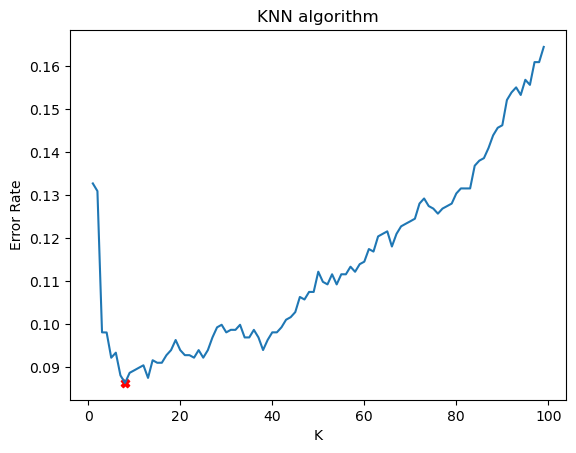

In [19]:
sns.lineplot(x = bigK, y = errmea)
plt.title('KNN algorithm')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.scatter(bigK[errmea.index(min(errmea))], min(errmea), marker='X', color = 'red')
plt.show()

# Questions?

# See you next class
